# Step 0 : Importation of the required libraries and data base

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import pandas as pd
from fuzzywuzzy import process

In [255]:
municipality = pd.read_csv('data/municipality_generalist.csv', sep=';')
medecin_gen = pd.read_csv('medecin_gen.csv')

# Step 1 : Treatment of the municipality data base

In [197]:
municipality=municipality.iloc[99:]
municipality.reset_index(inplace=True)
municipality.head()

,index,Commune_cod,Dep,Commune_name,gene_nbr2008,gene_nbr2009,gene_nbr2010,gene_nbr2011,gene_nbr2012,gene_nbr2013,...,gene_nbr2015,gene_nbr2016,gene_nbr2017,gene_nbr2018,gene_nbr2019,gene_nbr2020,gene_nbr2021,gene_nbr2022,gene_nbr2023,gene_nbr2024
0,99,2 004,2,AMBERIEU EN BUGEY,46188.0,55741.0,52713.0,54823.0,57292.0,58777.0,...,57367.0,59661.0,59813.0,60192.0,56877.0,52711.0,41824.0,41853.0,37432.0,25842.0
1,100,2 005,2,AMBERIEUX EN DOMBES,4366.0,5201.0,5885.0,8662.0,7857.0,8663.0,...,8814.0,9286.0,9231.0,9174.0,9351.0,8803.0,8796.0,8639.0,8617.0,4153.0
2,101,2 007,2,AMBRONAY,22615.0,24966.0,23980.0,25734.0,26402.0,25918.0,...,24274.0,24127.0,20992.0,18621.0,20537.0,22151.0,17573.0,18427.0,17299.0,12965.0
3,102,2 010,2,ANGLEFORT,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103,2 014,2,ARBENT,8941.0,9235.0,5476.0,8931.0,8864.0,8747.0,...,5476.0,5143.0,6411.0,7676.0,6589.0,7191.0,7438.0,6629.0,6202.0,4287.0


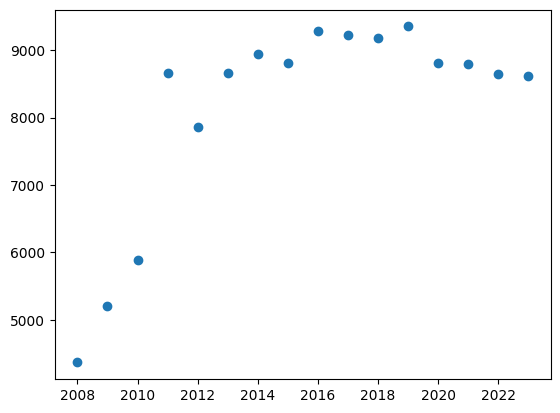

In [198]:
plt.scatter([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],municipality[['gene_nbr2008','gene_nbr2009','gene_nbr2010','gene_nbr2011','gene_nbr2012','gene_nbr2013','gene_nbr2014','gene_nbr2015','gene_nbr2016','gene_nbr2017','gene_nbr2018','gene_nbr2019','gene_nbr2020','gene_nbr2021','gene_nbr2022','gene_nbr2023']].iloc[1])

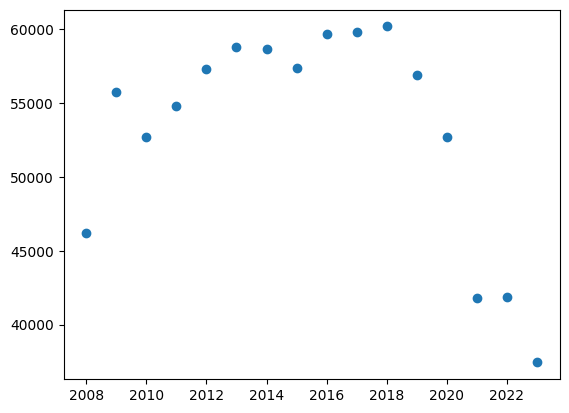

In [199]:
plt.scatter([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],municipality[['gene_nbr2008','gene_nbr2009','gene_nbr2010','gene_nbr2011','gene_nbr2012','gene_nbr2013','gene_nbr2014','gene_nbr2015','gene_nbr2016','gene_nbr2017','gene_nbr2018','gene_nbr2019','gene_nbr2020','gene_nbr2021','gene_nbr2022','gene_nbr2023']].iloc[0])

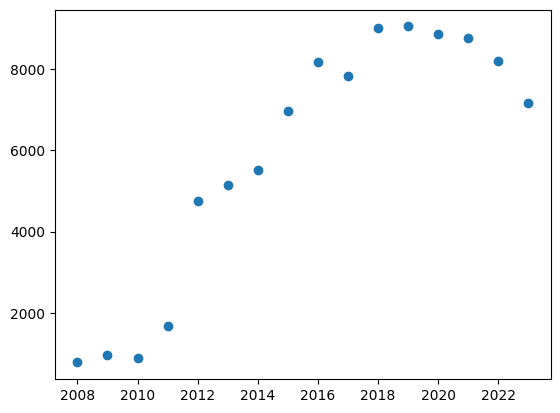

In [200]:
plt.scatter([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],municipality[['gene_nbr2008','gene_nbr2009','gene_nbr2010','gene_nbr2011','gene_nbr2012','gene_nbr2013','gene_nbr2014','gene_nbr2015','gene_nbr2016','gene_nbr2017','gene_nbr2018','gene_nbr2019','gene_nbr2020','gene_nbr2021','gene_nbr2022','gene_nbr2023']].iloc[20])

In [201]:
municipality['gene_nbr2023'].isnull().sum()

2802

# Step 2 : Create a column 

In [202]:
nbligne = municipality.shape[0]
Consul2023=municipality['gene_nbr2023'].isnull()
municipality.loc[:,'nbConsult']=0
for i in range (nbligne):
   annee = 2023
   while municipality['gene_nbr'+str(annee)].isnull().iloc[i] and annee>2008:
       annee = annee-1
   municipality.loc[i,'nbConsult']=municipality['gene_nbr'+str(annee)].iloc[i]
   #print(municipality['gene_nbr'+str(annee)].iloc[i])
municipality['nbConsult'].head()

0    37432.0
1     8617.0
2    17299.0
3       25.0
4     6202.0
Name: nbConsult, dtype: float64

In [203]:
print(municipality['nbConsult'].isnull().sum(), municipality.shape)

35 (12136, 22)


In [204]:
def remove_spaces_from_column(df, column_name):
   # Vérifier si la colonne existe et est de type 'object' (chaine de caractères)
   if column_name in df.columns and df[column_name].dtype == 'object':
       return df[column_name].str.replace(' ', '', regex=False)
   else:
       raise ValueError(f"La colonne {column_name} n'existe pas ou n'est pas de type chaîne.")

In [205]:
municipality['CodeCommune'] = remove_spaces_from_column(municipality, 'Commune_cod')

In [225]:
small_municipality = municipality[['CodeCommune','Dep','nbConsult','Commune_name']]

In [207]:
#type(small_municipality['Commune_cod'].iloc[0])
medecin_gen['codecommunecoordstructure3']=medecin_gen['codecommunecoordstructure3'].astype('str')
medecin_gen['CODGEO']=medecin_gen['CODGEO'].astype('str')
medecin_gen['Code Insee']=medecin_gen['Code Insee'].astype('str')
medecin_gen['Code commune']=medecin_gen['Code commune'].astype('str')
medecin_gen['Code commune2']=medecin_gen['Code commune2'].astype('str')

In [226]:
medecin_gen['LIBGEO2'] = medecin_gen['LIBGEO'].apply(lambda x: unidecode(x).upper().replace('-', ' '))
small_municipality['Commune_name2'] = small_municipality['Commune_name'].str.split('CEDEX').str[0].str.strip()

/var/folders/rf/dqdwsk6s06ngm9b4j17fkb2r0000gn/T/ipykernel_55349/1115434106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_municipality['Commune_name2'] = small_municipality['Commune_name'].str.split('CEDEX').str[0].str.strip()


In [227]:
small_municipality['Commune_name2'] = small_municipality['Commune_name2'].str.replace('ST ', 'SAINT ', regex=False)
df_grouped = small_municipality.groupby('Commune_name2', as_index=False).agg({
    'nbConsult': 'sum',    # Somme les valeurs de 'nbConsult'
    'CodeCommune': lambda x: x.mode()[0],'Dep':lambda x: x.mode()[0],'Commune_name':lambda x: x.mode()[0]  # Garde la première valeur de 'Autre_colonne' (ou utilisez d'autres fonctions)
})

# Afficher le résultat
print(df_grouped)

/var/folders/rf/dqdwsk6s06ngm9b4j17fkb2r0000gn/T/ipykernel_55349/1995428486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_municipality['Commune_name2'] = small_municipality['Commune_name2'].str.replace('ST ', 'SAINT ', regex=False)


      Commune_name2  nbConsult CodeCommune  Dep Commune_name
0                 0        3.0       14000   14            0
1          ABBARETZ    12157.0       45001   45     ABBARETZ
2         ABBECOURT        2.0       61002   61    ABBECOURT
3         ABBEVILLE   154533.0       81001   81    ABBEVILLE
4          ABEILHAN      813.0       35001   35     ABEILHAN
...             ...        ...         ...  ...          ...
11335        ZICAVO      686.0       21359   21       ZICAVO
11336    ZILLISHEIM    18424.0       69384   69   ZILLISHEIM
11337    ZINSWILLER     5634.0       68558   68   ZINSWILLER
11338         ZONZA     5034.0       21362   21        ZONZA
11339     ZUYDCOOTE     4996.0       60668   60    ZUYDCOOTE

[11340 rows x 5 columns]


In [229]:
data_m = medecin_gen.merge(df_grouped, left_on='LIBGEO2',right_on='Commune_name2',how='left')

In [230]:
print(data_m.shape, medecin_gen.shape,small_municipality.shape)

(5274, 67) (5274, 62) (12136, 5)


In [231]:
data_m['Commune_name2'].isnull().sum()

253

In [232]:
df_outer = pd.merge(medecin_gen, df_grouped, left_on='LIBGEO2',right_on='Commune_name2', how='outer', indicator=True)
print("\nRésultat de la jointure OUTER avec l'indicateur d'origine:")
print(df_outer)


Résultat de la jointure OUTER avec l'indicateur d'origine:
       Unnamed: 0    index       Doctor Name            Specialty  \
0             NaN      NaN               NaN                  NaN   
1             NaN      NaN               NaN                  NaN   
2             NaN      NaN               NaN                  NaN   
3          3345.0  84274.0  Dr Hélène GOSSET  Médecin généraliste   
4             NaN      NaN               NaN                  NaN   
...           ...      ...               ...                  ...   
14647         NaN      NaN               NaN                  NaN   
14648         NaN      NaN               NaN                  NaN   
14649         NaN      NaN               NaN                  NaN   
14650         NaN      NaN               NaN                  NaN   
14651         NaN      NaN               NaN                  NaN   

                                                  card_0  \
0                                                  

In [233]:
# Filtrer les lignes où la clé ne match pas (présent uniquement dans df1 ou df2)
non_matched_in_df1 = df_outer[df_outer['_merge'] == 'left_only']
non_matched_in_df2 = df_outer[df_outer['_merge'] == 'right_only']

In [234]:
print("\nValeurs présentes uniquement dans df1:")
print(non_matched_in_df1['LIBGEO2'].value_counts())


Valeurs présentes uniquement dans df1:
LIBGEO2
SAINT MAUR DES FOSSES    18
SAINT PRIEST EN JAREZ    11
MEUDON                    8
SAINT OUEN L'AUMONE       5
LA TESTE DE BUCH          5
                         ..
L'ETANG LA VILLE          1
L'ESCARENE                1
L'AIGUILLON SUR VIE       1
HORBOURG WIHR             1
VIRIEU                    1
Name: count, Length: 140, dtype: int64


In [235]:
non_matched_in_df1[non_matched_in_df1['LIBGEO2']=='SAINT PRIEST EN JAREZ']

,Unnamed: 0,index,Doctor Name,Specialty,card_0,card_3,card_4,Latitude,Longitude,Skills Processed,...,CODGEO,LIBGEO,MED14,LIBGEO2,Commune_name2,nbConsult,CodeCommune,Dep,Commune_name,_merge
12190,1112.0,18779.0,Dr Jean-Guillaume WEBER,Médecin généraliste,"['Lieu 1', 'Lieu 2', 'Lieu 3', 'Clinique Mutua...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine du sommei...",45.687990,4.866802,"['Expertises et actes', 'Apnée du sommeil', ""A...",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12191,1240.0,21724.0,Dr Benoit MOREL,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",45.521722,4.217009,NaN,...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12192,1335.0,24560.0,Dr Corinne BERTHELOT DEL AGUILA,Médecin généraliste,"['Tarifs et remboursement', '', 'Secteur 3 (no...",NaN,"['Tarifs', 'Consultation vidéo', '60 € à 65 €'...",45.468843,4.376682,"['Expertises et actes', 'Sexologie', 'Sexologi...",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12193,1408.0,26412.0,Dr Stéphane EPINAT,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",45.635759,4.388309,NaN,...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12194,2014.0,46519.0,Dr Catherine TRAN,Médecin généraliste,"['Tarifs et remboursement', 'Voir les tarifs',...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation de médecine générale'...",45.480513,4.433244,"['Expertises et actes', 'Gynécologie médicale'...",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12195,2444.0,60035.0,Dr Marion FRENOIS-VEYRAT,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",45.283970,4.391702,"['Expertises et actes', 'Vaccination COVID-19']",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12196,3243.0,81883.0,Dr Marc JACQUET,Médecin généraliste,"['Tarifs et remboursement', 'Voir les tarifs',...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine esthétiqu...",45.471171,4.374007,"['Expertises et actes', 'Cryolipolyse', 'Détat...",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12197,3795.0,96080.0,Dr Hervé BONNEFOND,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",45.450136,4.401846,NaN,...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12198,4461.0,116149.0,Dr Alice BUISSON,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",45.720408,4.356266,"['Expertises et actes', 'Électrocardiogramme (...",...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only
12199,4507.0,117666.0,Dr Paul FRAPPE,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation de médecine générale'...",45.473429,4.395900,NaN,...,42275,Saint-Priest-en-Jarez,"22664,8",SAINT PRIEST EN JAREZ,NaN,NaN,NaN,NaN,NaN,left_only


In [219]:
df_grouped[df_grouped['Commune_name2'].str.startswith('SAINT PRIEST')]

,Commune_name2,nbConsult,CodeCommune,Dep,Commune_name
10007,SAINT PRIEST,161474.0,70290,70,ST PRIEST


In [236]:
df_grouped[df_grouped['CodeCommune'].str.startswith('4227')]

,Commune_name2,nbConsult,CodeCommune,Dep,Commune_name
4786,LA VILLE AUX CLERCS,3815.0,42275,42,LA VILLE AUX CLERCS
10774,VERDES,1.0,42270,42,VERDES
10959,VILLEBAROU,3044.0,42276,42,VILLEBAROU


In [221]:
medecin_gen[medecin_gen['LIBGEO2'].str.startswith('ST')]

,Unnamed: 0,index,Doctor Name,Specialty,card_0,card_3,card_4,Latitude,Longitude,Skills Processed,...,Population totale,Population standardisée par la consommation de soins par tranche d'âge,APL,share_Doctolib,Fibre,codecommunecoordstructure3,CODGEO,LIBGEO,MED14,LIBGEO2
76,76,1962,Dr Denis Gerber,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",49.198244,6.927836,"['Expertises et actes', 'Gériatrie', ""Médecine...",...,11043.0,11571.757,2.585,0.142857,0.960922,57660,57660,Stiring-Wendel,"17189,6",STIRING WENDEL
118,118,3301,Dr Jean-Lionel BAGOT,Médecin généraliste,"['Tarifs et remboursement', '', '', '', 'Conve...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation courante', '0 € à 27 ...",48.588084,7.740951,"['Expertises et actes', 'Soins de support onco...",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
128,128,3575,Dr Philippe Montiage,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation', '25 €', 'Consultati...",48.579156,7.743350,"['Expertises et actes', 'Vaccination COVID-19']",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
292,292,7402,Dr Christophe Renaudin,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",48.563817,7.755171,NaN,...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
690,690,13046,Dr Cécile DENAES,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",50.812662,2.581087,"['Expertises et actes', 'Frottis', 'Implant co...",...,4341.0,4420.635,4.544,0.125000,0.972552,59580,59580,Steenvoorde,"20528,0",STEENVOORDE
741,741,13662,Dr Grazia MENEGAZZI,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation', '26,50 €', 'Consult...",48.580786,7.776956,NaN,...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
848,848,15567,Dr Christine Duong-Knecht,Médecin généraliste,"['Tarifs et remboursement', '', 'Carte Vitale ...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",48.586565,7.772973,"['Expertises et actes', 'Médecine de la nutrit...",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
849,849,15568,Dr Isabelle GRANDGIRARD,Médecin généraliste,"['Tarifs et remboursement', 'Voir les tarifs',...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de médecine générale'...",48.586902,7.780547,"['Expertises et actes', 'Acupuncture', 'Médeci...",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
853,853,15668,Dr Salam HAIDAR,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation vidéo', '25 €', 'Cons...",48.587963,7.778127,"['Expertises et actes', 'Médecine esthétique',...",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG
1076,1076,18366,Dr Véronique Isel,Médecin généraliste,"['Tarifs et remboursement', '', 'Carte Vitale ...",NaN,"['Tarifs', 'Consultation', '25 € à 70 €', 'Con...",48.577444,7.753101,"['Expertises et actes', 'Médecine de la nutrit...",...,290576.0,271647.257,5.497,0.042408,0.901392,67482,67482,Strasbourg,"18275,5",STRASBOURG


In [ ]:
medecin_gen = pd.read_csv('medecin_gen.csv')
commune = pd.read_excel('data/base_cc_comparateur_20171012.xls')

In [256]:
commune = commune[4:]
commune=commune[['Chiffres détaillés     -     Comparateur de territoires', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6',
       'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 17', 'Unnamed: 19',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26']]
commune.rename(columns = {'Chiffres détaillés     -     Comparateur de territoires':'CODGEO','Unnamed: 1' :'LIBGEO',
       'Unnamed: 2':'REG', 'Unnamed: 3':'DEP', 'Unnamed: 4':'Population', 'Unnamed: 6':'Superficie', 'Unnamed: 10':'Naissances',
       'Unnamed: 11':'Deces', 'Unnamed: 17':'Ménages', 'Unnamed: 12':'Logements', 'Unnamed: 19':'MED14',
       'Unnamed: 24':'Population_P_actif', 'Unnamed: 25':'Chomeurs', 'Unnamed: 26':'Actifs'},inplace = True)

In [258]:
commune.describe()

,CODGEO,LIBGEO,REG,DEP,Population,Superficie,Naissances,Deces,Logements,Ménages,MED14,Population_P_actif,Chomeurs,Actifs
count,36690,36690,36690,36690,35869,35869.00,35399,35399,35869,32930,32930.000000,35869,35869,35869
unique,36690,34175,18,101,5725,5287.00,590,446,30099,3612,26932.000000,28796,26071,28442
top,CODGEO,Sainte-Colombe,44,62,142,6.16,1,1,56,54,20653.333333,105,0,44
freq,1,13,5198,895,85,35.00,4590,5233,35,175,9.000000,37,413,52


In [260]:
medecin_gen.columns

Index(['Unnamed: 0', 'index', 'Doctor Name', 'Specialty', 'card_0', 'card_3',
       'card_4', 'Latitude', 'Longitude', 'Skills Processed', 'RPPS',
       'Nb Skills', 'moyens_paiement', 'carte_vitale', 'secteur',
       'Présentation', 'Langues parlées',
       'Diplômes nationaux et universitaires', 'Autres formations',
       'Expériences', 'Travaux et publications', 'Prix et distinctions',
       'site', 'Site web', 'Formations',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b', 'Travaux et publications b', 'Nb langues',
       'Expériences b', 'Formations b', 'Carac_card_1', 'Transport', 'Parking',
       'Infos', 'Coordonnées', 'Sans RDV', 'Nb_prix', 'Prix_min', 'Prix_max',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4', 'codecivilité',
       'share_F', 'Code commune', 'Code commune2', 'Code Insee',
       'Population totale',
       'Populat

In [264]:
medecin_gen['CODGEO']=medecin_gen['CODGEO'].astype('str')

In [265]:
data_m2 = medecin_gen.merge(commune, on='CODGEO',how='left')

In [266]:
print(data_m2.shape, medecin_gen.shape)

(5274, 74) (5274, 61)


In [267]:
data_m2

,Unnamed: 0,index,Doctor Name,Specialty,card_0,card_3,card_4,Latitude,Longitude,Skills Processed,...,Population,Superficie,Naissances,Deces,Logements,Ménages,MED14_y,Population_P_actif,Chomeurs,Actifs
0,0,1,Dr Anne Vaillant Moga,Médecin généraliste,"['Lieu 1', 'Lieu 2', 'Dr Anne Moga (Paris)', '...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation préalable de médecine...",48.869218,2.285468,"['Expertises et actes', 'Acné', 'Allergie', 'A...",...,2220445,105.4,28384,14056,1362181.884321,1036464,26194.666667,1554076.145618,144515.410524,1202565.278084
1,1,1,Dr Anne Vaillant Moga,Médecin généraliste,"['Lieu 1', 'Lieu 2', 'Dr Anne Moga (Paris)', '...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation préalable de médecine...",48.869218,2.285468,"['Expertises et actes', 'Acné', 'Allergie', 'A...",...,21428,4.39,278,122,8944.509571,8198,23070,13726.706498,1267.106223,10544.226563
2,2,10,Dr Joel Sanz,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', ""Consultation sur rendez-vous norma...",48.826720,2.243099,"['Expertises et actes', 'Médecine du sport']",...,116927,6.17,1702,770,64690.29123,54257,30904.5,78524.389934,6053.101932,63358.838326
3,3,16,Dr Bruno PICHAT,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation', '25 €', 'Consultati...",45.322978,5.562744,"['Expertises et actes', 'Gériatrie', 'Médecine...",...,7989,20.06,81,66,3472,3157,21132.173913,5046,487,3738
4,4,18,Dr Franck PERRUCHE,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation', '25 €', 'Enfant (de...",48.830736,2.331437,NaN,...,2220445,105.4,28384,14056,1362181.884321,1036464,26194.666667,1554076.145618,144515.410524,1202565.278084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,5269,138299,Salim Khelatou,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation de suivi de médecine ...",48.868165,2.532438,NaN,...,34955,6.86,621,213,14159.810439,13196,19342.758621,23320.737104,2556.688742,17793.223229
5270,5270,139511,Dr Maxime Blanchard,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...",NaN,50.354143,3.125980,NaN,...,5253,9.27,77,107,2202.692397,2024,16300.869565,3179.983842,490.587074,2172.86136
5271,5271,139527,Patrice CONQUEDO,Médecin généraliste,"['Tarifs et remboursement', '', '', '', '', 'C...","['Horaires et coordonnées', ""Horaires d'ouvert...","['Tarifs', 'Consultation en médecine générale'...",43.346324,-0.255128,"['Expertises et actes', ""Médecine de l'enfant ...",...,4132,13.15,51,28,1872.913938,1718,22364.642857,2576.54439,197.077366,1946.561133
5272,5272,139845,Dr Yves LEYLDE,Médecin généraliste,"['Tarifs et remboursement', '', '', 'Conventio...","['Horaires et coordonnées', ""Contact d'urgence...","['Tarifs', 'Consultation de médecine générale'...",44.469148,1.482660,"['Expertises et actes', 'Frottis', ""Médecine d...",...,725,10.58,3,3,385.342859,322,21912,444.886364,36.044034,331.605114
